# Mini-Project (24 Marks)

NOTE:

1) ALL  THE QUESTIONS ARE MANDATORY

2) You can use the Library and Frameworks wherever required except for TF-IDF as you have to implement TF-IDF from scratch.

3) Merge all your problems into a single python Notebook and Upload a Single Python notebook for all your problems.

4) Solution to the problems should be separate and placed one after the other in the final submission Notebook.

5) Do not submit Zip files.

6) Explicitly mention the questions as a Markdown cell in your notebook to segregate the different parts that you are attempting.

7) No deadline extension would be entertained. We are very strict on this from now. We really appreciate you to start working on the miniproject from Day - 1 so as to prevent any last minute occlusions ( Health / office work or any other )

You can use the following references for completing the assignment.

1) https://medium.com/analytics-vidhya/part-of-speech-and-viterbi-algorithm-11138ef0c63d (Links to an external site.)

2) https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 (Links to an external site.)

3) https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460 (Links to an external site.)

 

Dataset:  https://www.kaggle.com/datasets/crawford/20-newsgroups/data

The dataset have 20 newsgroup. Consider each news as separate document.

 

Term - Frequency Inverse Document Frequency  

 

1) Remove Stopwords (1 Mark)

2) Remove the punctuations. the special characters and convert the text to lower case.        (2 Mark)

3) create bigrams for the entire dataset and list down 10 least frequent bigrams. ( 1 Marks )

4) create bigrams for the entire dataset and list down 10 most frequent bigrams. ( 1 Marks )

5) Differentiate between stemming and lemmetization by running algorithm on few words. You can choose the words by your own. ( 1 Mark )

5) Implement the TF-IDF from scratch to use it for step 6. ( 3 Mark )

6) plot the scatter graph of 5 random words from a document such  that - ( 3 Marks )

x - axis frequency of word in the document
y - axis Tf-IDF value
Make sure to assign label to the scatter point which represent the word.
 

Refer to the following link to create POS labeled data: https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/

 

Perform Part of Speech Tagging using the Viterbi Algorithm, 

7) Label the cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 )   ( 2 Mark )

8) Split the Train and the Test Dataset                      (1 Mark)

9) Implement the Viterbi Algorithm ( you can use Library) to get the Part of Speech Tagging.        ( 3 Marks)

10) Calculate the Accuracy and F1 score. ( Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)

   Topic Modelling        

Use cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 ) 

11) Using the LDA algorithm create the Topics (10) for the Corpus             (2 Marks)

12) List down the 10 words in each of the Topics Extracted.           (2 Marks)

# Extracting a ZIP file  with using the built-in zipfile module

In [2]:
# Importing required packages
import zipfile as zf
import os

# Defining the path to the ZIP file and the destination directory
zip_file_path = r"C:\Users\ASUS\jupyterworkspace\Assignment & Mini Project\Module_05_Text Mining\Text-Mining-MiniProject01-newsgroup\datasets_archiveFiles.zip"
extract_to_path = r"C:\Users\ASUS\jupyterworkspace\Assignment & Mini Project\Module_05_Text Mining\Text-Mining-MiniProject01-newsgroup\datasets_extractedFiles"

# Creating the destination directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Opening the ZIP file and extract its contents
with zf.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)


In [3]:
# Importing required package
import pandas as pd
# Initializing empty lists, docs (to hold text lines) and labels (to hold category names)
docs = []
labels = []
# Iterating over all files in the dataset_path using os.listdir()
for file_name in os.listdir(extract_to_path):
    file_path = os.path.join(extract_to_path, file_name)
# Filtering for .txt files using if file_name.endswith('.txt').
    if file_name.endswith('.txt'):
# Extracting the category name from the file name
        category = file_name.replace('.txt', '')
# Opening each .txt file in latin1 encoding (to handle special characters).
        try:
            with open(file_path, 'r', encoding='latin1') as file:
# Reading each line in the file, strip whitespace, and append it to the documents list
                for line in file:
# Appending the corresponding category to the labels list
                    docs.append(line.strip())
                    labels.append(category)
        except Exception as e:
            print(f"Error reading file {extract_to_path}: {e}")

# Combining docs and labels into a pandas DataFrame with columns text and category.
dataFrame = pd.DataFrame({'text': docs, 'category': labels})

# Displaying the first five rows of the dataset and summarize it
print("*****************************************************Displaying below first 5 records**********************************************************")
print(dataFrame.head())


*****************************************************Displaying below first 5 records**********************************************************
                                          text     category
0           From: mathew <mathew@mantis.co.uk>  alt.atheism
1  Subject: Alt.Atheism FAQ: Atheist Resources  alt.atheism
2                                               alt.atheism
3              Archive-name: atheism/resources  alt.atheism
4          Alt-atheism-archive-name: resources  alt.atheism


In [4]:
# Displaying total count of records in the DataFrame
print("Count of all records in the DataFrame:- {}".format(len(dataFrame)))

Count of all records in the DataFrame:- 1719260


In [5]:
# Displayimg A list of unique categories found.
print("A list of unique categories found:- {}".format(dataFrame['category'].unique()))

A list of unique categories found:- ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


# Task 1:- Remove Stopwords (1 Mark)

In [6]:
# Importing required packages
from nltk.corpus import stopwords # nltk.corpus.stopwords: Provides a collection of common stopwords for multiple languages.
from nltk.tokenize import word_tokenize # nltk.tokenize.word_tokenize: A tokenizer that splits text into individual words
import nltk # import nltk: The Natural Language Toolkit is a library used for natural language processing tasks.

# Downloading the stopwords and punkt tokenizer if not already downloaded
nltk.download('stopwords') # nltk.download('stopwords'): Ensures the required stopword dataset is downloaded locally
nltk.download('punkt') # nltk.download('punkt'): Downloads the punkt tokenizer model, which is needed for tokenizing text into words or sentences

# Getting the list of English stopwords
stop_words = set(stopwords.words('english')) # stopwords.words('english'): Retrieves a predefined list of English stopwords

# Functioning to remove stopwords
def remove_stopwords(text): # def remove_stopwords(text):: Defines a function to clean text by removing stopwords
    if not isinstance(text, str): # if not isinstance(text, str):: Checks if the input is a string; if not, it returns the input unchanged
        return text  
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Applying the function to the 'text' column
dataFrame['text_cleaned'] = dataFrame['text'].apply(remove_stopwords)

#dataFrame['text_cleaned'] = dataFrame['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Displaying the first five rocords
print("****************************************Displaying below 5 records************************************************")
print(dataFrame[['text', 'text_cleaned']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


****************************************Displaying below 5 records************************************************
                                          text  \
0           From: mathew <mathew@mantis.co.uk>   
1  Subject: Alt.Atheism FAQ: Atheist Resources   
2                                                
3              Archive-name: atheism/resources   
4          Alt-atheism-archive-name: resources   

                                    text_cleaned  
0             : mathew < mathew @ mantis.co.uk >  
1  Subject : Alt.Atheism FAQ : Atheist Resources  
2                                                 
3               Archive-name : atheism/resources  
4           Alt-atheism-archive-name : resources  


In [7]:
# Displaying the first 5 records
dataFrame.head(n=5)

,text,category,text_cleaned
0,From: mathew <mathew@mantis.co.uk>,alt.atheism,: mathew < mathew @ mantis.co.uk >
1,Subject: Alt.Atheism FAQ: Atheist Resources,alt.atheism,Subject : Alt.Atheism FAQ : Atheist Resources
2,,alt.atheism,
3,Archive-name: atheism/resources,alt.atheism,Archive-name : atheism/resources
4,Alt-atheism-archive-name: resources,alt.atheism,Alt-atheism-archive-name : resources


# Task 2:- Remove the punctuations. the special characters and convert the text to lower case.        (2 Mark)

In [8]:
# Importing required packages
import re

# Functioning to preprocess text
def preprocess_text(text):
# Removing punctuation and special characters using regex
    text = re.sub(r'[^\w\s]', '', text)  # Keeping only words and spaces
# Converting text to lowercase
    text = text.lower()
    return text

# Applying the preprocessing function to the 'text' column
dataFrame['text_cleaned'] = dataFrame['text_cleaned'].apply(preprocess_text)

# Displaying the first five rocords of updated dataFrame
print("***********************************************Displaying below the first five rocords of updated dataframe*********************************************")
dataFrame.head()

***********************************************Displaying below the first five rocords of updated dataframe*********************************************


,text,category,text_cleaned
0,From: mathew <mathew@mantis.co.uk>,alt.atheism,mathew mathew mantiscouk
1,Subject: Alt.Atheism FAQ: Atheist Resources,alt.atheism,subject altatheism faq atheist resources
2,,alt.atheism,
3,Archive-name: atheism/resources,alt.atheism,archivename atheismresources
4,Alt-atheism-archive-name: resources,alt.atheism,altatheismarchivename resources


# Task 3:- create bigrams for the entire dataset and list down 10 least frequent bigrams. ( 1 Marks )

In [10]:
# Importing required packages
import nltk
from nltk.util import bigrams
from collections import Counter

nltk.download('punkt') # nltk.download('punkt'): Downloads the punkt tokenizer model, which is needed for tokenizing text into words or sentences

# Assuming 'dataFrame' contains a 'text_cleaned' column
# Tokenizing text data from the 'text_cleaned' column
dataFrame['tokens'] = dataFrame['text_cleaned'].astype(str).apply(nltk.word_tokenize)

# Generating all bigrams from the tokenized text data
bigrams_list = [bigram for tokens in dataFrame['tokens'] for bigram in bigrams(tokens)]

# Counting the occurrences of each bigram
bigram_frequency = Counter(bigrams_list)

# Extracting the 10 least frequent bigrams
least_frequent_bigrams = bigram_frequency.most_common()[-10:]

# Printing the 10 least frequent bigrams
print("10 Least Frequent Bigrams:")
for bigram, count in reversed(least_frequent_bigrams):
    print(f"{bigram}: {count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


10 Least Frequent Bigrams:
('reign', 'tek'): 2
('ways', 'means'): 2
('returns', 'seeing'): 2
('happy', 'returns'): 2
('village', 'many'): 2
('something', 'significant'): 2
('dumb', 's'): 2
('beomes', 'dumb'): 2
('terminal', 'beomes'): 2
('enter', 'terminal'): 2


# Task 4:- create bigrams for the entire dataset and list down 10 most frequent bigrams. ( 1 Marks )

In [75]:
# Downloading the punkt tokenizer model (only need to run once)
nltk.download('punkt')

# Assuming 'dataFrame' contains a 'text_cleaned' column with cleaned text data
# Tokenize the text data in the 'text_cleaned' column
dataFrame['tokens'] = dataFrame['text_cleaned'].astype(str).apply(nltk.word_tokenize)

# Creating bigrams for all the tokenized text in the dataframe
bigrams_list = [
    bigram
    for tokens in dataFrame['tokens']
    for bigram in bigrams(tokens)
]

# Counting the frequency of each bigram
bigram_frequency = Counter(bigrams_list)

# Getting the 10 most frequent bigrams
top_10_bigrams = bigram_frequency.most_common(10)

# Displaying the results for the 10 most frequent bigrams
print("10 Most Frequent Bigrams:")
for bigram, count in top_10_bigrams:
    print(f"{bigram}: {count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


10 Most Frequent Bigrams:
('ax', 'ax'): 111892
('max', 'ax'): 8640
('ca', 'nt'): 5876
('nt', 'know'): 3433
('0', '0'): 3127
('_', '_'): 3096
('r', 'g'): 2460
('g', 'r'): 2298
('would', 'nt'): 2248
('wo', 'nt'): 2235


# Task 5:-  Differentiate between stemming and lemmetization by running algorithm on few words. You can choose the words by your own. ( 1 Mark )

#### Stemming and Lemmatization are techniques in Natural Language Processing (NLP) used to reduce words to their base or root form. However, they work differently:

Stemming: Truncates words to their root form, often using heuristics without considering meaning.

Lemmatization: Reduces words to their base or dictionary form, considering the word's meaning and part of speech.

In [76]:
# Importing required packages
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

# Initializing stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Sample words for demonstration
words = ["atheism", "economy", "sports", "finance", "technologies"]

# Functioning to get wordnet POS for lemmatization
def get_wordnet_pos(words):
    tag = nltk.pos_tag([words])[0][1][0].lower()
    if tag == 'v':
        return wordnet.VERB
    elif tag == 'n':
        return wordnet.NOUN
    elif tag == 'r':
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Stemming and Lemmatization for each word
stemmed_words = [stemmer.stem(word) for word in words]
lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
# Displaying output results
print(f"Word:{words}\t\nStemming:{stemmed_words}\t\nLemmatized{lemmatized_words}")


Word:['atheism', 'economy', 'sports', 'finance', 'technologies']	
Stemming:['atheism', 'economi', 'sport', 'financ', 'technolog']	
Lemmatized['atheism', 'economy', 'sport', 'finance', 'technology']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
# Displaying the first 5 records
dataFrame.head()

,text,category,text_cleaned,tokens
0,From: mathew <mathew@mantis.co.uk>,alt.atheism,mathew mathew mantiscouk,"[mathew, mathew, mantiscouk]"
1,Subject: Alt.Atheism FAQ: Atheist Resources,alt.atheism,subject altatheism faq atheist resources,"[subject, altatheism, faq, atheist, resources]"
2,,alt.atheism,,[]
3,Archive-name: atheism/resources,alt.atheism,archivename atheismresources,"[archivename, atheismresources]"
4,Alt-atheism-archive-name: resources,alt.atheism,altatheismarchivename resources,"[altatheismarchivename, resources]"


# Task 5:- Implement the TF-IDF from scratch to use it for step 6. ( 3 Mark )

In [22]:
# Importing required packages
import math
from collections import defaultdict

# Downloading necessary NLTK data
nltk.download('punkt')
 
 
# Step 1: Calculating Term Frequency (TF)
def compute_tf(doc):
    tf = defaultdict(int)
    words = nltk.word_tokenize(doc)
    for word in words:
        tf[word] += 1
    for word in tf:
        tf[word] = tf[word] / len(words)
    return tf
 
# Step 2: Calculating Inverse Document Frequency (IDF)
def compute_idf(docs):
    idf = defaultdict(int)
    total_docs = len(docs)
    for doc in docs:
        words = set(nltk.word_tokenize(doc))
        for word in words:
            idf[word] += 1
    for word in idf:
        idf[word] = math.log(total_docs / idf[word])
    return idf
 
# Step 3: Calculating TF-IDF
def compute_tfidf(tf, idf):
    tfidf = defaultdict(float)
    for word in tf:
        tfidf[word] = tf[word] * idf[word]
    return tfidf
 
# Computing TF for each document
dataFrame['tf'] = dataFrame['text_cleaned'].apply(compute_tf)
 
# Computing IDF for the entire corpus
idf = compute_idf(dataFrame['text_cleaned'])
 
# Computing TF-IDF for each document
dataFrame['tfidf'] = dataFrame['tf'].apply(lambda tf: compute_tfidf(tf, idf))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
dataFrame.head()

,text,category,text_cleaned,tokens,tf,tfidf
0,From: mathew <mathew@mantis.co.uk>,alt.atheism,mathew mathew mantiscouk,"[mathew, mathew, mantiscouk]","{'mathew': 0.6666666666666666, 'mantiscouk': 0...","{'mathew': 5.472624151824846, 'mantiscouk': 2...."
1,Subject: Alt.Atheism FAQ: Atheist Resources,alt.atheism,subject altatheism faq atheist resources,"[subject, altatheism, faq, atheist, resources]","{'subject': 0.2, 'altatheism': 0.2, 'faq': 0.2...","{'subject': 0.741858552610251, 'altatheism': 1..."
2,,alt.atheism,,[],{},{}
3,Archive-name: atheism/resources,alt.atheism,archivename atheismresources,"[archivename, atheismresources]","{'archivename': 0.5, 'atheismresources': 0.5}","{'archivename': 4.607870483576128, 'atheismres..."
4,Alt-atheism-archive-name: resources,alt.atheism,altatheismarchivename resources,"[altatheismarchivename, resources]","{'altatheismarchivename': 0.5, 'resources': 0.5}","{'altatheismarchivename': 5.656441042965747, '..."


# Task 6:- plot the scatter graph of 5 random words from a document such  that - ( 3 Marks )

x - axis frequency of word in the document

y - axis Tf-IDF value

Make sure to assign label to the scatter point which represent the word.

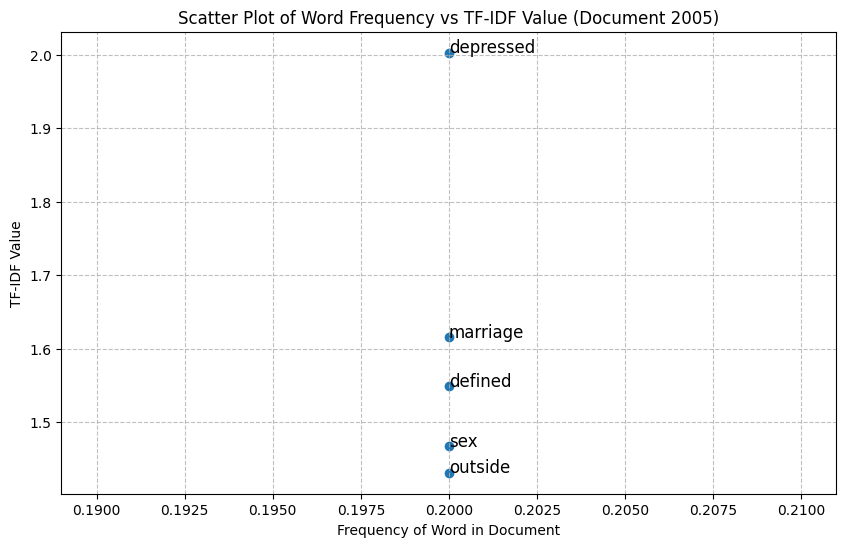

In [25]:
# Importing required packages
import matplotlib.pyplot as plt
import random

# Selecting a document to plot from dataframe
# Choose 2005th record in the dataframe
document_index = 2005
document_tf = dataFrame['tf'].iloc[document_index]
document_tfidf = dataFrame['tfidf'].iloc[document_index]
 
# Ensure there are words to sample
if len(document_tf) < 5:
    random_words = list(document_tf.keys())
else:
    random_words = random.sample(list(document_tf.keys()), 5)
 
# Prepare data for plotting
x = [document_tf[word] for word in random_words]
y = [document_tfidf[word] for word in random_words]
 
# Plotting the scatter graph
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
 
# Adding labels to the scatter points
for i, word in enumerate(random_words):
    plt.text(x[i], y[i], word, fontsize=12)
 
# Setting the labels and title
plt.xlabel('Frequency of Word in Document')
plt.ylabel('TF-IDF Value')
#plt.title('Scatter Plot of Word Frequency vs TF-IDF Value')
plt.title(f'Scatter Plot of Word Frequency vs TF-IDF Value (Document {document_index})')
plt.grid(True, linestyle='--', alpha=0.8)
# Show the plot
plt.show()

# Task 7:- Label the cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 )   ( 2 Mark )

In [26]:
# Importing required packages
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
encoder = LabelEncoder()

# Encode the 'category' column and add the result as a new 'label' column
dataFrame['label'] = encoder.fit_transform(dataFrame['category'])

# Creating a dictionary mapping each category to its corresponding label
category_to_label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Displaying the category-to-label mapping
print("Category to Label Mapping:")
print(category_to_label_mapping)

# Displaying the cleaned dataset with the newly added 'label' column
print("\nCleaned Dataset with Labels:")
columns_to_display = ['text_cleaned', 'tokens', 'tfidf', 'category', 'label']
print(dataFrame[columns_to_display].head())

Category to Label Mapping:
{'alt.atheism': 0, 'comp.graphics': 1, 'comp.os.ms-windows.misc': 2, 'comp.sys.ibm.pc.hardware': 3, 'comp.sys.mac.hardware': 4, 'comp.windows.x': 5, 'misc.forsale': 6, 'rec.autos': 7, 'rec.motorcycles': 8, 'rec.sport.baseball': 9, 'rec.sport.hockey': 10, 'sci.crypt': 11, 'sci.electronics': 12, 'sci.med': 13, 'sci.space': 14, 'soc.religion.christian': 15, 'talk.politics.guns': 16, 'talk.politics.mideast': 17, 'talk.politics.misc': 18, 'talk.religion.misc': 19}

Cleaned Dataset with Labels:
                                 text_cleaned  \
0                 mathew  mathew  mantiscouk    
1  subject  altatheism faq  atheist resources   
2                                               
3               archivename  atheismresources   
4            altatheismarchivename  resources   

                                           tokens  \
0                    [mathew, mathew, mantiscouk]   
1  [subject, altatheism, faq, atheist, resources]   
2                        

# Task 8:- Split the Train and the Test Dataset                      (1 Mark)

In [27]:
# Displaying all records
dataFrame

,text,category,text_cleaned,tokens,tf,tfidf,label
0,From: mathew <mathew@mantis.co.uk>,alt.atheism,mathew mathew mantiscouk,"[mathew, mathew, mantiscouk]","{'mathew': 0.6666666666666666, 'mantiscouk': 0...","{'mathew': 5.472624151824846, 'mantiscouk': 2....",0
1,Subject: Alt.Atheism FAQ: Atheist Resources,alt.atheism,subject altatheism faq atheist resources,"[subject, altatheism, faq, atheist, resources]","{'subject': 0.2, 'altatheism': 0.2, 'faq': 0.2...","{'subject': 0.741858552610251, 'altatheism': 1...",0
2,,alt.atheism,,[],{},{},0
3,Archive-name: atheism/resources,alt.atheism,archivename atheismresources,"[archivename, atheismresources]","{'archivename': 0.5, 'atheismresources': 0.5}","{'archivename': 4.607870483576128, 'atheismres...",0
4,Alt-atheism-archive-name: resources,alt.atheism,altatheismarchivename resources,"[altatheismarchivename, resources]","{'altatheismarchivename': 0.5, 'resources': 0.5}","{'altatheismarchivename': 5.656441042965747, '...",0
...,...,...,...,...,...,...,...
1719255,,talk.religion.misc,,[],{},{},19
1719256,You are in the village. Many happy returns! Be...,talk.religion.misc,village many happy returns seeing,"[village, many, happy, returns, seeing]","{'village': 0.2, 'many': 0.2, 'happy': 0.2, 'r...","{'village': 1.6658252006848437, 'many': 1.0332...",19
1719257,,talk.religion.misc,,[],{},{},19
1719258,[your ways and means get reign of the tek!],talk.religion.misc,ways means get reign tek,"[ways, means, get, reign, tek]","{'ways': 0.2, 'means': 0.2, 'get': 0.2, 'reign...","{'ways': 1.4414975375045613, 'means': 1.261085...",19


In [11]:
# Importing necessary function for dataset splitting
from sklearn.model_selection import train_test_split

# Defining the test size and random state for reproducibility
test_size = 0.2
random_state = 42

# Perform the split: separate into training and testing sets
train, test = train_test_split(dataFrame, test_size=test_size, random_state=random_state)


In [12]:
# Verifying train test split size
print("Train set size:- {}".format(len(train)))
print("Test set size:- {}".format(len(test)))

Train set size:- 1375408
Test set size:- 343852


# Task 9:- Implement the Viterbi Algorithm ( you can use Library) to get the Part of Speech Tagging

In [20]:
# Importing required packages
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, f1_score

# Downloading required NLTK data if not already available
nltk.download('averaged_perceptron_tagger')

# Function to tokenize text and perform POS tagging using NLTK
def perform_pos_tagging(text):
    # Tokenize the input text
    tokens = word_tokenize(text)
    # Apply part-of-speech tagging
    return nltk.pos_tag(tokens)

# Applying POS tagging to the 'text_cleaned' column in both training and test datasets
train['pos_tags'] = train['text_cleaned'].apply(perform_pos_tagging)
test['pos_tags'] = test['text_cleaned'].apply(perform_pos_tagging)

# Displaying a preview of the POS tags in the training dataset
print("Preview of POS tags in the training dataset:")
print(train[['text_cleaned', 'pos_tags']].head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Preview of POS tags in the training dataset:
                                              text_cleaned  \
1079672                        dyer  spdcccom  steve dyer    
1547247                                                      
1390063      laws pertaining right people keep bear arms     
1192000  dave crawford  crawford  noaoedu   executive d...   
782183                            yogi answered    phone     

                                                  pos_tags  
1079672  [(dyer, NN), (spdcccom, NN), (steve, VBP), (dy...  
1547247                                                 []  
1390063  [(laws, NNS), (pertaining, VBG), (right, JJ), ...  
1192000  [(dave, NN), (crawford, NN), (crawford, NN), (...  
782183          [(yogi, RB), (answered, VBD), (phone, NN)]  


# Task 10:- Calculate the Accuracy and F1 score. ( Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)

In [14]:
# Function to compute accuracy
def compute_accuracy(pred_tags, true_tags):
    # Using sum and zip to count correct predictions
    correct_predictions = sum(pred == true for pred, true in zip(pred_tags, true_tags))
    # Return the accuracy as a fraction of correct predictions
    return correct_predictions / len(true_tags)

# Evaluating accuracy on the test set
# Applying POS tagging to the 'text_cleaned' column in the test set
test_tags = test['text_cleaned'].apply(perform_pos_tagging)

# Assuming pred_tags is already computed (from your model output)
pred_tags = test['pos_tags']

# true_tags contains the actual POS tags for comparison
true_tags = test_tags

# Computing the accuracy of predictions
accuracy = compute_accuracy(pred_tags, true_tags)

# Displaying the accuracy result
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [15]:
# Import necessary libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

# Initialize MultiLabelBinarizer with sparse output
multi_label_binarizer = MultiLabelBinarizer(sparse_output=True)

# Fit the binarizer on the true labels to create the sparse matrix
true_labels_sparse = multi_label_binarizer.fit_transform(true_tags)

# Transform predicted labels using the fitted binarizer
predicted_labels_sparse = multi_label_binarizer.transform(pred_tags)

# Compute the F1 score for multi-label classification (using sparse matrices)
f1_score_value = f1_score(true_labels_sparse, predicted_labels_sparse, average='samples')

# Print the F1 score with formatting for readability
print(f"F1 Score : {f1_score_value:.4f}")

F1 Score : 0.7409


C:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Use cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 ) 


# Task 11:- Using the LDA algorithm create the Topics (10) for the Corpus             (2 Marks)

In [16]:
# Import necessary libraries
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokenized text into space-separated strings for vectorization
processed_texts = dataFrame['tokens'].str.join(' ')

# Initialize the TF-IDF vectorizer with optimized settings
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,          # Aggressively filter out terms that appear in more than 90% of documents
    min_df=5,            # Ignore terms that appear in fewer than 5 documents
    stop_words='english', # Remove common English stopwords
    max_features=3000,   # Limit the number of features for efficiency
    dtype='float32'      # Use float32 to reduce memory usage
)

# Transform the processed texts into a sparse TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_texts)

# Set the number of topics for the LDA model
num_topics = 10

# Initialize and fit the Latent Dirichlet Allocation model
lda_model = LatentDirichletAllocation(
    n_components=num_topics,  # Number of topics
    random_state=42,          # Ensure reproducibility
    n_jobs=-1                 # Utilize all available cores for computation
)
lda_model.fit(tfidf_matrix)

# Retrieve the feature names (vocabulary) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

C:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


In [17]:
feature_names

array(['00', '04', '05', ..., 'zero', 'zone', 'zootorontoedu'],
      dtype=object)

# Task 12:-  List down the 10 words in each of the Topics Extracted.           (2 Marks)

In [19]:
# Define the number of top words to display for each topic
top_n_words = 10

# Iterate through each topic to extract and display the top words
for index, topic_weights in enumerate(lda_model.components_):
    print(f"Topic {index + 1}:")
    
    # Identify indices of the top words for this topic
    top_word_indices = topic_weights.argsort()[-top_n_words:][::-1]
    
    # Retrieve the actual words corresponding to the top indices
    top_words = [feature_names[i] for i in top_word_indices]
    
    # Display the top words as a space-separated string
    print("Top Words: " + ", ".join(top_words))
    print("-" * 40)  # Add a separator for better readability

Topic 1:
Top Words: case, world, nt, composmswindowsmisc, best, think, power, price, reason, answer
----------------------------------------
Topic 2:
Top Words: newsgroup, john, university, file, michael, scicrypt, scispace, recsporthockey, compgraphics, socreligionchristian
----------------------------------------
Topic 3:
Top Words: email, nt, thing, years, list, send, things, robert, start, children
----------------------------------------
Topic 4:
Top Words: ax, thanks, newsgroup, help, wrote, line, recautos, phone, compsysibmpchardware, compsysmachardware
----------------------------------------
Topic 5:
Top Words: document_id, jim, understand, db, gun, sale, andrew, christian, programs, situation
----------------------------------------
Topic 6:
Top Words: writes, article, newsgroup, steve, paul, recmotorcycles, scimed, scielectronics, files, like
----------------------------------------
Topic 7:
Top Words: david, internet, says, chip, information, way, jews, key, subject, system